<a href="https://colab.research.google.com/github/sepehrilami/LungSegmentation/blob/main/DataLoader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import torch
import torch.nn as nn
from torch.autograd import Variable

import argparse
import os
import random
import torch.optim as optim

import numpy as np
import torch.nn.functional as F
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from PIL import Image
from torch.utils.data import Dataset, DataLoader
import matplotlib.pylab as plt
from skimage.transform import resize
from time import time



In [2]:
!wget https://www.dropbox.com/sh/1j2x17k8y18k3l6/AACkAc6bCEqYVXBdODFo6Iqya/VESSEL12_ExampleScans.tar.bz2

--2020-11-04 07:47:01--  https://www.dropbox.com/sh/1j2x17k8y18k3l6/AACkAc6bCEqYVXBdODFo6Iqya/VESSEL12_ExampleScans.tar.bz2
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.1, 2620:100:601d:1::a27d:501
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/raw/1j2x17k8y18k3l6/AACkAc6bCEqYVXBdODFo6Iqya/VESSEL12_ExampleScans.tar.bz2 [following]
--2020-11-04 07:47:01--  https://www.dropbox.com/sh/raw/1j2x17k8y18k3l6/AACkAc6bCEqYVXBdODFo6Iqya/VESSEL12_ExampleScans.tar.bz2
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc241f5eb56729500f3d599cde02.dl.dropboxusercontent.com/cd/0/inline/BCgzotKxuMhPq0kyLcnlUJd1gA7YFUY6xZZzfnlY5VPX19V8r2o1u_x6MYbYJH75uOjtP9q37l5ljrViftqmXLeAqOZAciPZ_g-eIySic_LZkA/file# [following]
--2020-11-04 07:47:02--  https://uc241f5eb56729500f3d599cde02.dl.dropboxusercontent.com/cd/0/inline/BCg

In [3]:
!tar xf VESSEL12_ExampleScans.tar.bz2

In [11]:
!pip install SimpleITK

In [12]:
import SimpleITK as sitk
import numpy as np

def load_itk(filename):

    # Reads the image
    image = sitk.ReadImage(filename)

    # Convert the image to a numpy array first and then shuffle the dimensions to get axis in the order z,y,x
    scan = sitk.GetArrayFromImage(image)

    # Read the spacing along each dimension
    spacing = np.array(list(image.GetSpacing()))

    return scan, spacing

In [13]:
import glob
import skimage.io as io
import os

dataset_root_dir = ""
output_dir = "./"

path = os.path.join(output_dir, "scans")
if not os.path.isdir(path):
    os.mkdir(path)


input_dir = os.path.join(dataset_root_dir, "scans/*.mhd")
for file in glob.glob(input_dir):
    path = file
    img, spacing = load_itk(path)
    name = f'{file.split("/")[-1].split(".")[0]}_{spacing[0]}_{spacing[1]}_{spacing[2]}'
    np.save(os.path.join(output_dir, "scans", name), img)
    print(img.shape)

(418, 512, 512)
(448, 512, 512)
(459, 512, 512)


In [14]:
!pip install pydicom

In [15]:
from LungDetection2 import preprocess_mask

In [16]:
preprocessor = preprocess_mask()

In [17]:
path = os.path.join(output_dir, "annotations")
if not os.path.isdir(path):
    os.mkdir(path)


input_dir = os.path.join(dataset_root_dir, "annotations/*.mhd")
for file in glob.glob(input_dir):
    path = file
    img, spacing = load_itk(path)
    name = f'{file.split("/")[-1].split(".")[0]}'
    separated_mask = preprocessor.separate_left_and_right(img)
    np.save(os.path.join(output_dir, "annotations", name), img)
    print(img.shape)

KeyboardInterrupt: ignored

In [7]:
separated_mask.shape, np.unique(separated_mask)

((50, 512, 512), array([0, 1, 2], dtype=uint8))

In [8]:
def draw(images, columns=4):
    rows = int(np.ceil(images.shape[0] / columns))
    max_size = 20
    
    width = max(columns * 5, max_size)
    height = width * rows // columns

    plt.figure(figsize=(width, height))
    plt.gray()
    plt.subplots_adjust(0,0,1,1,0.01,0.01)
    for i in range(images.shape[0]):
        plt.subplot(rows,columns,i+1), plt.imshow(images[i]), plt.axis('off')
        # use plt.savefig(...) here if you want to save the images as .jpg, e.g.,
    plt.show()

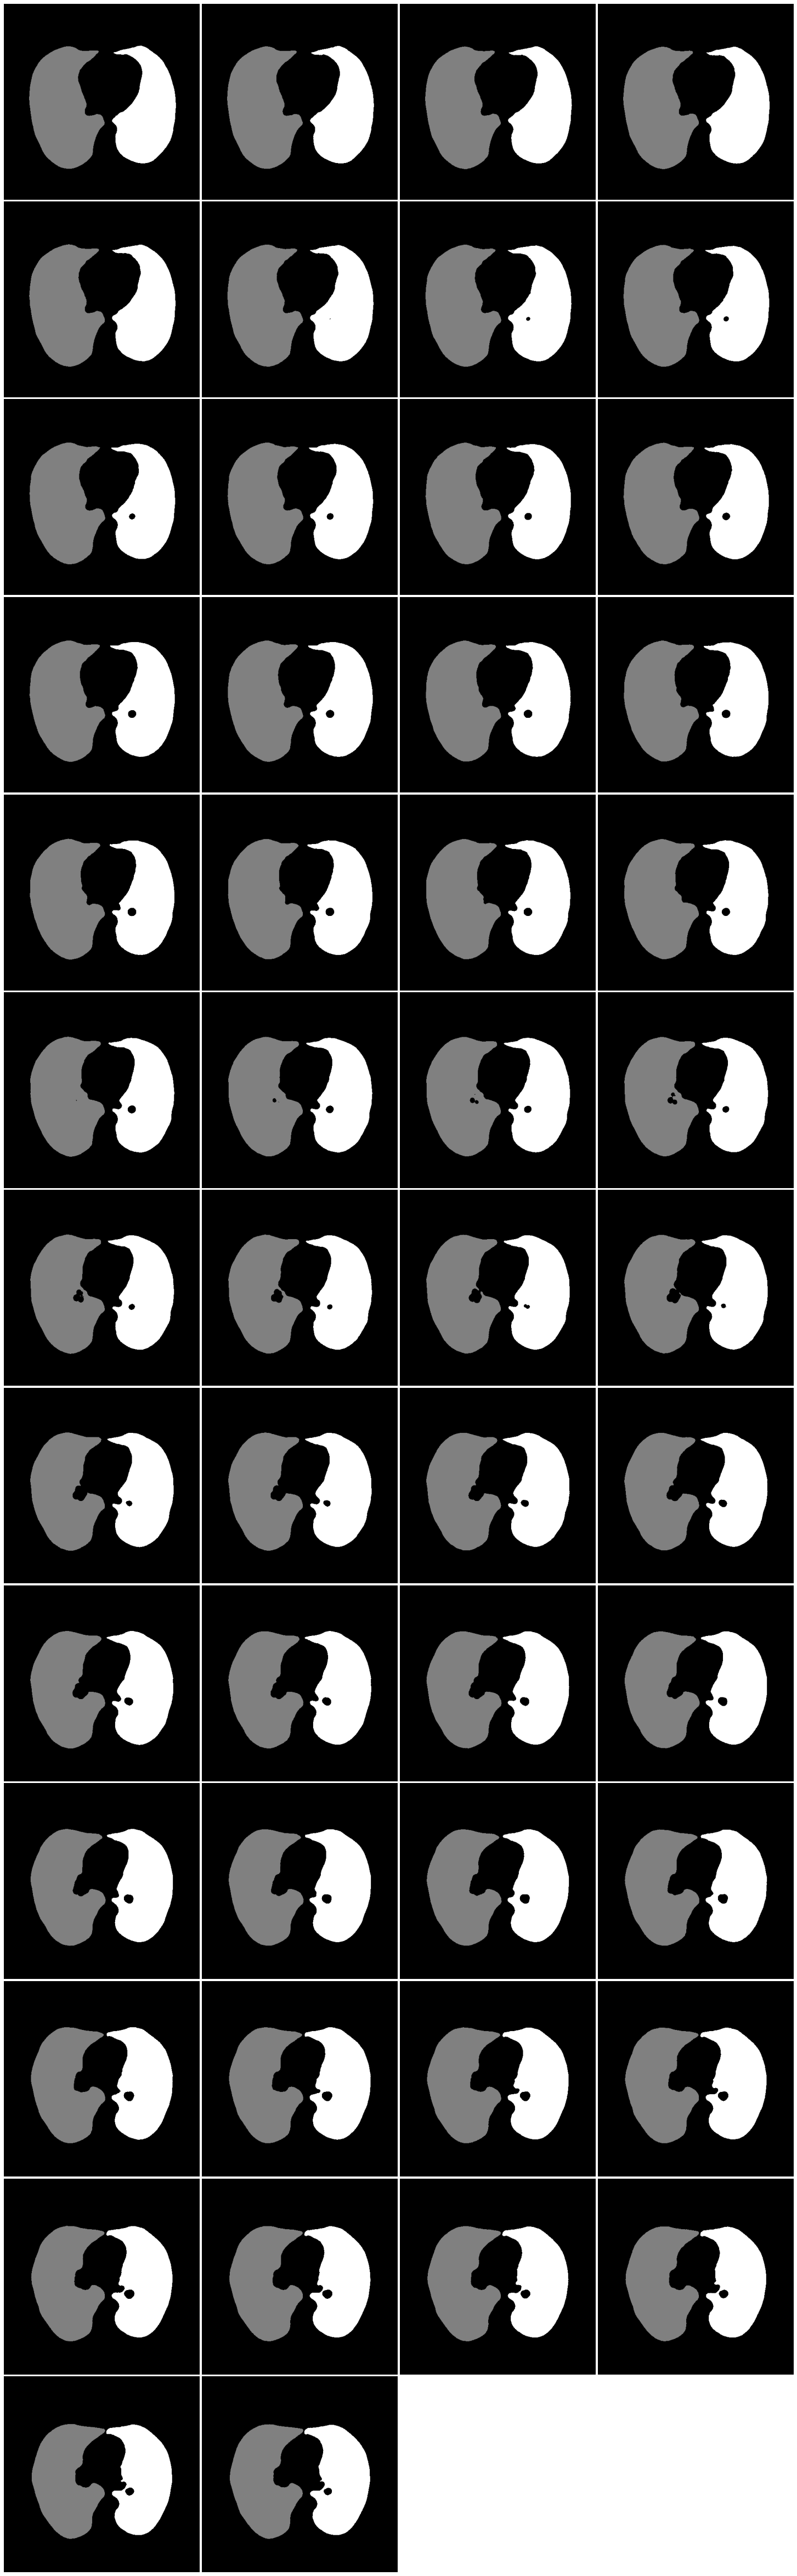

In [9]:
draw(separated_mask)

In [22]:
np.unique(separated_mask)

array([  0, 128, 255], dtype=uint8)

In [ ]:
output_dir = "./"

for folder in ("scans", "annotations"):
    path = os.path.join(output_dir, folder)
    if not os.path.isdir(path):
        os.mkdir(path)

# input_dir = input()
for file in ("scans", "annotations"):
    img = io.imread(file, plugin='simpleitk')